<a href="https://colab.research.google.com/github/MiaKuntz/machine_learning_2/blob/main/ML4BI_E5_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for BI 2

## Deep Learning exercises for week 6

In this exercise, you will expand last weeks exercise by training pre-trained model

**About the CIFAR-10 dataset**

The CIFAR-10 dataset is a widely-used dataset for benchmarking machine learning algorithms, especially in the field of image recognition. It consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 test images. The classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Each image is labeled with one of these 10 classes, making it a standard dataset for evaluating algorithms for image classification tasks.

The CIFAR-10 dataset was created by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton and is a subset of the 80 million tiny images dataset. Due to its moderate size and complexity, CIFAR-10 serves as an excellent benchmark for algorithms and techniques in computer vision, particularly for methodologies that are aimed at performing well on small to medium-sized datasets in image recognition tasks.

**Load and prepare the data**

In [1]:
import tensorflow as tf # importing the tensorflow library
from tensorflow import keras # importing the keras library from tensorflow
from tensorflow.keras.utils import to_categorical # importing the to_categorical function from the keras.utils module
from tensorflow.keras import datasets, layers, models # importing the datasets, layers, and models modules from the keras library
import matplotlib.pyplot as plt # importing the matplotlib.pyplot library

# loading the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() # loading the CIFAR-10 dataset into the train_images, train_labels, test_images, and test_labels variables respectively 

# assigning class names in the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck'] 

**Plot images**

Plot some images from the dataset.

/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/

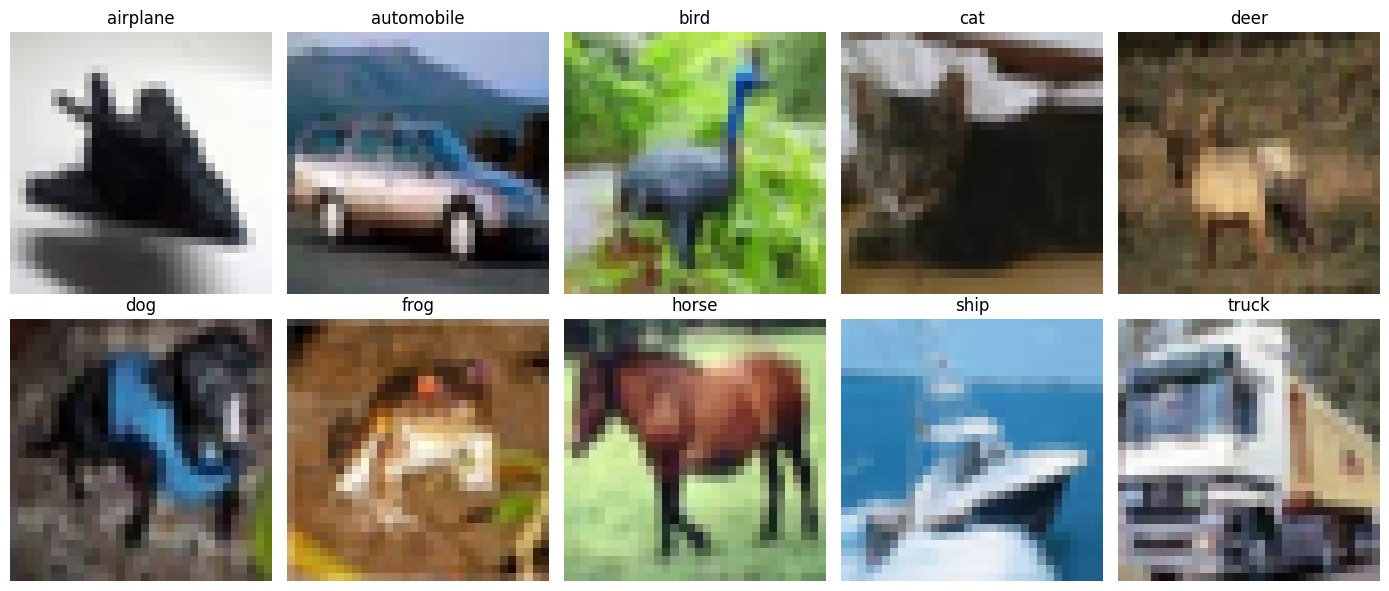

In [2]:
import numpy as np # importing the numpy library

# initializing a plot
fig, axes = plt.subplots(2, 5, figsize=(14, 6)) # initializing a plot with 2 rows and 5 columns with a figure size of 14x6
axes = axes.ravel() # flattening the axes array to make it easier to iterate over 

# plotting one image from each class
for i in range(10): # iterating over the 10 classes in the CIFAR-10 dataset
    # finding the index of the first image of each class
    index = np.where(train_labels.flatten() == i)[0][0] # finding the index of the first image of each class in the train_labels array
    img = train_images[index] # getting the image at the index found above 

    # plottng the image
    axes[i].imshow(img, cmap=plt.cm.binary) # plotting the image with a binary colormap
    axes[i].set_title(class_names[i]) # setting the title of the image to the class name
    axes[i].axis('off') # turning off the axis for the image

plt.tight_layout() # adjusting the layout of the plot
plt.show() # displaying the plot
# the plot shows images from each of the 10 classes in the CIFAR-10 dataset

In [3]:
# converting labels to one-hot encoding
train_labels = to_categorical(train_labels) # converting the train_labels to one-hot encoding so that they can be used in the model, since the model expects the labels to be in one-hot encoding
test_labels = to_categorical(test_labels) # converting the test_labels to one-hot encoding so that they can be used in the model, since the model expects the labels to be in one-hot encoding

**Model building**

Build a convnet without adding data augmentation.

In [4]:
# Input layer
inputs = tf.keras.Input(shape=(32, 32, 3)) # creating an input layer with a shape of 32x32x3 (32x32 pixels with 3 color channels) 

# Normalization layer
x = layers.Rescaling(1./255)(inputs) # normalizing the input data by dividing by 255 to scale the pixel values to the range [0, 1] 

# First Convolutional Block
x = layers.Conv2D(32, (3, 3), activation='relu')(x) # creating a convolutional layer with 32 filters of size 3x3 and ReLU activation function 
x = layers.MaxPooling2D((2, 2))(x) # creating a max pooling layer with a pool size of 2x2 

# Second Convolutional Block
x = layers.Conv2D(64, (3, 3), activation='relu')(x) # creating a convolutional layer with 64 filters of size 3x3 and ReLU activation function
x = layers.MaxPooling2D((2, 2))(x) # creating a max pooling layer with a pool size of 2x2

# Third Convolutional Block
x = layers.Conv2D(128, (3, 3), activation='relu')(x) # creating a convolutional layer with 128 filters of size 3x3 and ReLU activation function
x = layers.MaxPooling2D((2, 2))(x) # creating a max pooling layer with a pool size of 2x2

# Flatten and Dense Layers
x = layers.Flatten()(x) # flattening the output of the convolutional layers
x = layers.Dense(64, activation='relu')(x) # creating a dense layer with 64 units and ReLU activation function
outputs = layers.Dense(10, activation='softmax')(x) # creating a dense layer with 10 units (one for each class) and softmax activation function

# Model creation
model = models.Model(inputs=inputs, outputs=outputs) # creating a model with the input and output layers

model.summary() # printing a summary of the model

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

**Compile and train the model**

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) # compiling the model with the Adam optimizer, categorical crossentropy loss function, and accuracy metric 

callbacks = [ # creating a list of callbacks to be used during training
    keras.callbacks.ModelCheckpoint( # creating a ModelCheckpoint callback to save the best model during training
        filepath="convnet_from_scratch.keras", # specifying the file path to save the model
        save_best_only=True, # saving only the best model
        monitor="val_loss") # monitoring the validation loss to determine the best model
]

history = model.fit(train_images, train_labels, # training the model on the training data
                    epochs=50, # training for 50 epochs
                    validation_split=0.2, # using 20% of the training data for validation
                    batch_size=256, # using a batch size of 256 (this is the number of samples used in each iteration of training)
                    callbacks = callbacks) # using the callbacks defined above

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.2506 - loss: 2.0169 - val_accuracy: 0.4278 - val_loss: 1.5895
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.4511 - loss: 1.5118 - val_accuracy: 0.4939 - val_loss: 1.4160
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.5128 - loss: 1.3619 - val_accuracy: 0.5409 - val_loss: 1.3116
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.5510 - loss: 1.2610 - val_accuracy: 0.5765 - val_loss: 1.2152
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.5862 - loss: 1.1597 - val_accuracy: 0.5930 - val_loss: 1.1777
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.6119 - loss: 1.1019 - val_accuracy: 0.6177 - val_loss: 1.1195
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.6399 - loss: 1.0179 - val_accuracy: 0.6205 - val_loss: 1.1175
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.6525 - loss: 0.9966 - val_acc

**Plotting Training and Validation Loss and Accuracy**

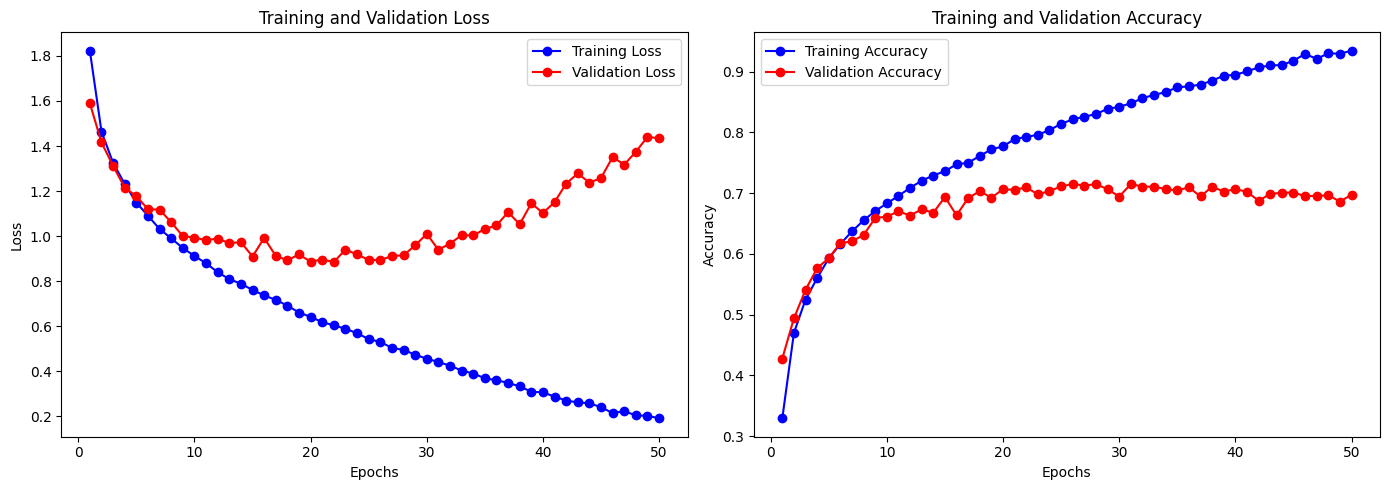

In [6]:
# assuming 'history' is the return value from model.fit()
history_dict = history.history # extracting the history dictionary from the history object

# extracting loss and accuracy history
train_loss = history_dict['loss'] # extracting the training loss history
val_loss = history_dict['val_loss'] # extracting the validation loss history
train_accuracy = history_dict['accuracy'] # extracting the training accuracy history
val_accuracy = history_dict['val_accuracy'] # extracting the validation accuracy history

epochs = range(1, len(train_loss) + 1) # creating a range of epochs for plotting 

# plotting training and validation loss
plt.figure(figsize=(14, 5)) # setting the figure size for the plot to 14x5 

# training and validation loss plot
plt.subplot(1, 2, 1) # creating a subplot with 1 row and 2 columns and selecting the first plot
plt.plot(epochs, train_loss, 'bo-', label='Training Loss') # plotting the training loss
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss') # plotting the validation loss
plt.title('Training and Validation Loss') # setting the title of the plot
plt.xlabel('Epochs') # setting the x-axis label
plt.ylabel('Loss') # setting the y-axis label
plt.legend() # displaying the legend

# training and validation accuracy plot
plt.subplot(1, 2, 2) # selecting the second plot
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy') # plotting the training accuracy
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy') # plotting the validation accuracy
plt.title('Training and Validation Accuracy') # setting the title of the plot
plt.xlabel('Epochs') # setting the x-axis label
plt.ylabel('Accuracy') # setting the y-axis label
plt.legend() # displaying the legend

# adjusting the plots to ensure they don't overlap
plt.tight_layout() # adjusting the layout of the plot
plt.show() # displaying the plot
# the plot shows the training and validation loss and accuracy over the epochs
# the training loss decreases and the accuracy increases over time, while the validation loss and accuracy show a similar trend
# although the training loss continues to decrease, the validation loss starts to increase after a certain number of epochs, indicating overfitting
# the model should be evaluated on the test set to get an estimate of its performance on unseen data

**Test data evaluation**

In [7]:
best_model = keras.models.load_model("convnet_from_scratch.keras") # loading the best model saved during training

test_loss, test_acc = best_model.evaluate(test_images, test_labels) # evaluating the best model on the test data
print(f"Test accuracy: {test_acc}") # printing the test accuracy
# the test accuracy is a measure of how well the model performs on unseen data
# it is an important metric to evaluate the generalization capability of the model
# a test accuracy close to the validation accuracy indicates that the model is performing well on unseen data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7082 - loss: 0.8716
Test accuracy: 0.7045000195503235


## Data augmentation addition

Now, add a data augmentation step and compare model performance.

**Model building**

In [8]:
data_augmentation = keras.Sequential( # creating a sequential model for data augmentation
    [
        layers.RandomFlip("horizontal"), # randomly flipping the image horizontally 
        layers.RandomRotation(0.1), # randomly rotating the image by a factor of 0.1
        layers.RandomZoom(0.2), # randomly zooming into the image by a factor of 0.2
    ]
)

inputs = keras.Input(shape=(32, 32, 3)) # creating an input layer with a shape of 32x32x3

# applying augmentation on the inputs
x = data_augmentation(inputs) # applying the data augmentation on the input data

# Normalization layer
x = layers.Rescaling(1./255)(x) # normalizing the input data by dividing by 255 to scale the pixel values to the range [0, 1]

# Convolutional blocks and rest of the model
x = layers.Conv2D(32, (3, 3), activation='relu')(x) # creating a convolutional layer with 32 filters of size 3x3 and ReLU activation function
x = layers.MaxPooling2D((2, 2))(x) # creating a max pooling layer with a pool size of 2x2
x = layers.Conv2D(64, (3, 3), activation='relu')(x) # creating a convolutional layer with 64 filters of size 3x3 and ReLU activation function
x = layers.MaxPooling2D((2, 2))(x) # creating a max pooling layer with a pool size of 2x2
x = layers.Conv2D(128, (3, 3), activation='relu')(x) # creating a convolutional layer with 128 filters of size 3x3 and ReLU activation function
x = layers.MaxPooling2D((2, 2))(x) # creating a max pooling layer with a pool size of 2x2
x = layers.Flatten()(x) # flattening the output of the convolutional layers
x = layers.Dense(64, activation='relu')(x) # creating a dense layer with 64 units and ReLU activation function
outputs = layers.Dense(10, activation='softmax')(x) # creating a dense layer with 10 units (one for each class) and softmax activation function

# creating the model
model = keras.Model(inputs=inputs, outputs=outputs) # creating a model with the input and output layers

model.summary() # printing a summary of the model

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

**Compile and train the model**

In [9]:
model.compile(optimizer='adam', # compiling the model with the Adam optimizer
              loss='categorical_crossentropy', # using the categorical crossentropy loss function
              metrics=['accuracy']) # using the accuracy metric

callbacks = [ # creating a list of callbacks to be used during training
    keras.callbacks.ModelCheckpoint( # creating a ModelCheckpoint callback to save the best model during training
        filepath="aug_convnet_from_scratch.keras", # specifying the file path to save the model
        save_best_only=True, # saving only the best model
        monitor="val_loss") # monitoring the validation loss to determine the best model
]

history = model.fit(train_images, train_labels, # training the model on the training data
                    epochs=100, # training for 100 epochs
                    validation_split=0.2, # using 20% of the training data for validation
                    batch_size=256, # using a batch size of 256 (this is the number of samples used in each iteration of training)
                    callbacks = callbacks, # using the callbacks defined above
                    verbose=0) # setting the verbosity to 0 to suppress the output

**Plotting Training and Validation Loss and Accuracy**

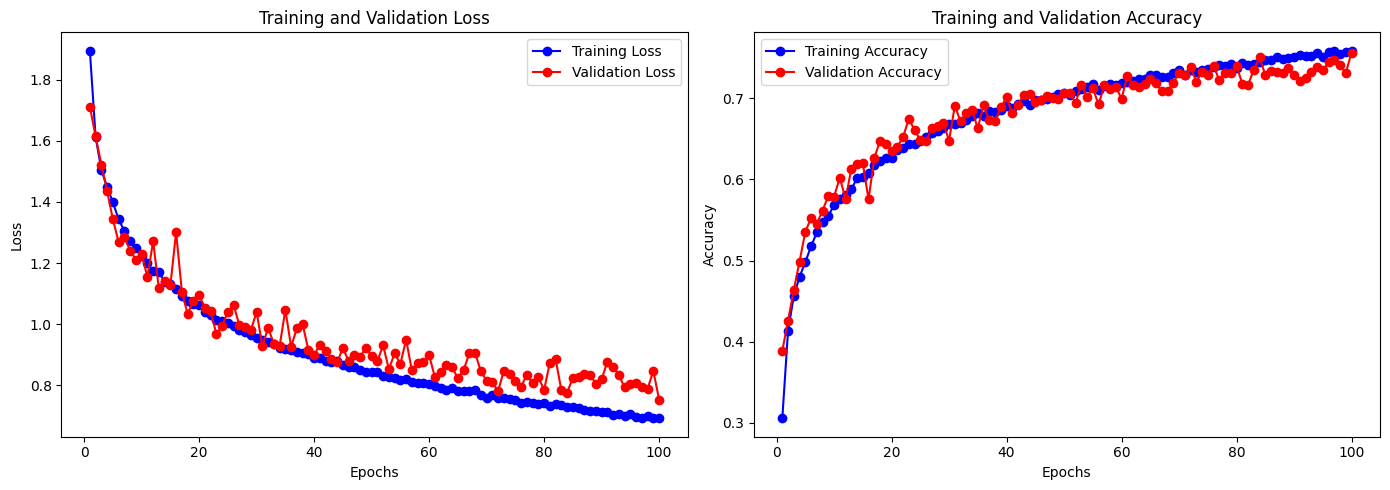

In [10]:
# assuming 'history' is the return value from model.fit()
history_dict = history.history # extracting the history dictionary from the history object

# extracting loss and accuracy history 
train_loss = history_dict['loss'] # extracting the training loss history
val_loss = history_dict['val_loss'] # extracting the validation loss history
train_accuracy = history_dict['accuracy'] # extracting the training accuracy history
val_accuracy = history_dict['val_accuracy'] # extracting the validation accuracy history

epochs = range(1, len(train_loss) + 1) # creating a range of epochs for plotting

# plotting training and validation loss
plt.figure(figsize=(14, 5)) # setting the figure size for the plot to 14x5

# training and validation loss plot
plt.subplot(1, 2, 1) # creating a subplot with 1 row and 2 columns and selecting the first plot
plt.plot(epochs, train_loss, 'bo-', label='Training Loss') # plotting the training loss
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss') # plotting the validation loss
plt.title('Training and Validation Loss') # setting the title of the plot
plt.xlabel('Epochs') # setting the x-axis label
plt.ylabel('Loss') # setting the y-axis label
plt.legend() # displaying the legend

# training and validation accuracy plot
plt.subplot(1, 2, 2) # selecting the second plot
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy') # plotting the training accuracy
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy') # plotting the validation accuracy
plt.title('Training and Validation Accuracy') # setting the title of the plot
plt.xlabel('Epochs') # setting the x-axis label
plt.ylabel('Accuracy') # setting the y-axis label
plt.legend() # displaying the legend

# adjusting the plots to ensure they don't overlap
plt.tight_layout() # adjusting the layout of the plot
plt.show() # displaying the plot
# the plot shows the training and validation loss and accuracy over the epochs
# the training loss decreases and the accuracy increases over time, while the validation loss and accuracy show a similar trend
# the training and validation curves are closer together, indicating that data augmentation has helped reduce overfitting

In [11]:
def print_best_val_loss_and_accuracy(history): # defining a function to print the best validation loss and accuracy
    history_dict = history.history # extracting the history dictionary from the history object

    # finding the index of the best validation loss
    best_val_loss_index = np.argmin(history_dict['val_loss']) # finding the index of the minimum validation loss in the history dictionary by accessing the 'val_loss' key

    # retrieving the best validation loss
    best_val_loss = history_dict['val_loss'][best_val_loss_index] # retrieving the best validation loss based on the index found above by accessing the 'val_loss' key in the history dictionary

    # retrieving the validation accuracy corresponding to the best validation loss
    best_val_accuracy = history_dict['val_accuracy'][best_val_loss_index] # retrieving the validation accuracy corresponding to the best validation loss based on the index found above by accessing the 'val_accuracy' key in the history dictionary

    print(f"Best Validation Loss: {best_val_loss}") # printing the best validation loss
    print(f"Validation Accuracy at Best Loss: {best_val_accuracy}") # printing the validation accuracy at the best loss

In [12]:
print_best_val_loss_and_accuracy(history) # calling the function to print the best validation loss and accuracy
# the function prints the best validation loss and the validation accuracy at that loss
# this information can be useful to understand the performance of the model during training and identify the best model based on validation loss
# the best model is the one with the lowest validation loss

Best Validation Loss: 0.7529295086860657
Validation Accuracy at Best Loss: 0.7562000155448914


In [13]:
best_model = keras.models.load_model("aug_convnet_from_scratch.keras") # loading the best model saved during training

test_loss, test_acc = best_model.evaluate(test_images, test_labels) # evaluating the best model on the test data
print(f"Test accuracy: {test_acc}") # printing the test accuracy
# the test accuracy is a measure of how well the model performs on unseen data
# it is an important metric to evaluate the generalization capability of the model
# a test accuracy close to the validation accuracy indicates that the model is performing well on unseen data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7526 - loss: 0.7468
Test accuracy: 0.7555000185966492


## Experiment with more data augmentation
Try experimenting with adding more data augmentation techniques

In [14]:
# Enhanced data augmentation
data_augmentation = keras.Sequential( # creating a sequential model for data augmentation
    [
        layers.RandomFlip("horizontal", input_shape=(32, 32, 3)), # flipping the image horizontally 
        layers.RandomRotation(0.1), # rotating the image by a factor of 0.1
        layers.RandomZoom(0.2), # zooming into the image by a factor of 0.2
        layers.RandomContrast(0.1), # adjusting the contrast of the image by a factor of 0.1
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1), # translating the image by a factor of 0.1
        # potentially add more augmentation techniques here
    ]
)

inputs = keras.Input(shape=(32, 32, 3)) # creating an input layer with a shape of 32x32x3

# applying enhanced augmentation on the inputs
x = data_augmentation(inputs) # applying the data augmentation on the input data

# continuing with normalization and the rest of your model
x = layers.Rescaling(1./255)(x) # normalizing the input data by dividing by 255 to scale the pixel values to the range [0, 1]
x = layers.Conv2D(32, (3, 3), activation='relu')(x) # creating a convolutional layer with 32 filters of size 3x3 and ReLU activation function
x = layers.MaxPooling2D((2, 2))(x) # creating a max pooling layer with a pool size of 2x2
x = layers.Conv2D(64, (3, 3), activation='relu')(x) # creating a convolutional layer with 64 filters of size 3x3 and ReLU activation function
x = layers.MaxPooling2D((2, 2))(x) # creating a max pooling layer with a pool size of 2x2
x = layers.Conv2D(128, (3, 3), activation='relu')(x) # creating a convolutional layer with 128 filters of size 3x3 and ReLU activation function
x = layers.MaxPooling2D((2, 2))(x) # creating a max pooling layer with a pool size of 2x2
x = layers.Flatten()(x) # flattening the output of the convolutional layers
x = layers.Dense(64, activation='relu')(x) # creating a dense layer with 64 units and ReLU activation function
outputs = layers.Dense(10, activation='softmax')(x) # creating a dense layer with 10 units (one for each class) and softmax activation function

# creating the model
model = keras.Model(inputs=inputs, outputs=outputs) # creating a model with the input and output layers 

/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam', # compiling the model with the Adam optimizer
              loss='categorical_crossentropy', # using the categorical crossentropy loss function
              metrics=['accuracy']) # using the accuracy metric

callbacks = [ # creating a list of callbacks to be used during training
    keras.callbacks.ModelCheckpoint( # creating a ModelCheckpoint callback to save the best model during training
        filepath="more_aug_convnet_from_scratch.keras", # specifying the file path to save the model
        save_best_only=True, # saving only the best model
        monitor="val_loss") # monitoring the validation loss to determine the best model
]

history = model.fit(train_images, train_labels, # training the model on the training data
                    epochs=100, # training for 100 epochs
                    validation_split=0.2, # using 20% of the training data for validation
                    batch_size=256, # using a batch size of 256 (this is the number of samples used in each iteration of training)
                    callbacks = callbacks) # using the callbacks defined above

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.2136 - loss: 2.0839 - val_accuracy: 0.3239 - val_loss: 1.8734
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.3775 - loss: 1.7096 - val_accuracy: 0.4348 - val_loss: 1.5662
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.4143 - loss: 1.6145 - val_accuracy: 0.4793 - val_loss: 1.4848
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.4440 - loss: 1.5402 - val_accuracy: 0.4701 - val_loss: 1.5115
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.4637 - loss: 1.4848 - val_accuracy: 0.4931 - val_loss: 1.4386
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.4867 - loss: 1.4245 - val_accuracy: 0.5296 - val_loss: 1.3496
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.5017 - loss: 1.3922 - val_accuracy: 0.5405 - val_loss: 1.2950
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.5143 - loss: 1.37

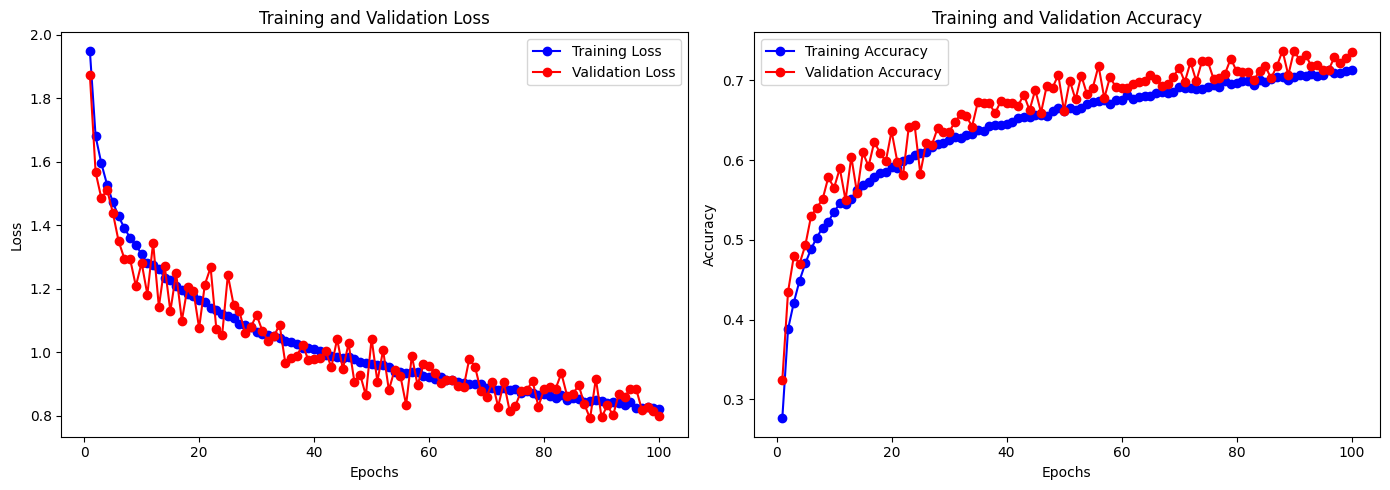

In [16]:
# assuming 'history' is the return value from model.fit()
history_dict = history.history # extracting the history dictionary from the history object

# extracting loss and accuracy history
train_loss = history_dict['loss'] # extracting the training loss history
val_loss = history_dict['val_loss'] # extracting the validation loss history
train_accuracy = history_dict['accuracy'] # extracting the training accuracy history
val_accuracy = history_dict['val_accuracy'] # extracting the validation accuracy history

epochs = range(1, len(train_loss) + 1) # creating a range of epochs for plotting
 
# plotting training and validation loss
plt.figure(figsize=(14, 5)) # setting the figure size for the plot to 14x5

# training and validation loss plot
plt.subplot(1, 2, 1) # creating a subplot with 1 row and 2 columns and selecting the first plot
plt.plot(epochs, train_loss, 'bo-', label='Training Loss') # plotting the training loss
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss') # plotting the validation loss
plt.title('Training and Validation Loss') # setting the title of the plot
plt.xlabel('Epochs') # setting the x-axis label
plt.ylabel('Loss') # setting the y-axis label
plt.legend() # displaying the legend

# training and validation accuracy plot
plt.subplot(1, 2, 2) # selecting the second plot
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy') # plotting the training accuracy
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy') # plotting the validation accuracy
plt.title('Training and Validation Accuracy') # setting the title of the plot
plt.xlabel('Epochs') # setting the x-axis label
plt.ylabel('Accuracy') # setting the y-axis label
plt.legend() # displaying the legend

plt.tight_layout() # adjusting the layout of the plot to prevent overlap
plt.show() # displaying the plot
# the plot shows the training and validation loss and accuracy over the epochs
# the training loss decreases and the accuracy increases over time, while the validation loss and accuracy show a similar trend
# the training and validation curves are closer together, indicating that data augmentation has helped reduce overfitting

In [17]:
print_best_val_loss_and_accuracy(history) # calling the function to print the best validation loss and accuracy
# the function prints the best validation loss and the validation accuracy at that loss
# this information can be useful to understand the performance of the model during training and identify the best model based on validation loss
# the best model is the one with the lowest validation loss

Best Validation Loss: 0.7921291589736938
Validation Accuracy at Best Loss: 0.7372999787330627


In [18]:
best_model = keras.models.load_model("more_aug_convnet_from_scratch.keras") # loading the best model saved during training

test_loss, test_acc = best_model.evaluate(test_images, test_labels) # evaluating the best model on the test data
print(f"Test accuracy: {test_acc}") # printing the test accuracy
# the test accuracy is a measure of how well the model performs on unseen data
# it is an important metric to evaluate the generalization capability of the model
# a test accuracy close to the validation accuracy indicates that the model is performing well on unseen data
# the test accuracy can be used to compare the performance of different models and select the best one for deployment

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7359 - loss: 0.7807
Test accuracy: 0.7289999723434448


## What's next?

To further increase the performance of our model, we could make some tweaks here and there, like icreasing the number of filters in the convolutional layers can help the model learn more complex features. Similarly, adjusting the number of neurons in the dense layers might improve learning capacity.

However, at this stage, gains from such changes are likely going to marginal.

Instead, there are two things that would likely boost performance:

1) More and better data! The data is greatly pixilated. Higher resolution data would allow us to build deeper models that generalize better.

2) More and better tricks! Next in the course, we'll learn about advanced computer vision techniques that can push performance even further.